## EE 461P: Data Science Principles  
### Homework 3 
### Total points: 80
### Due: Thursday, Mar 7, 2023, submitted via Canvas by 11:59 pm  

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UT eID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TAs know.

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

### Name(s) and EID(s):
1. Laith Altarabishi - la26744
2. 

### Homework group No.: 

# Q1. - Stochastic Gradient Descent (25 pts)
1. (**5pts**) Using stochastic gradient descent, derive the coefficent updates for all 4 coefficients of the model (assuming squared error as your loss function): 
$$ y = w_0 + w_1x_1 + w_2x_1^{2}x_2 + w_3e^{-x_1}+ w_4log(x_3) $$ 


2. (**20pts**) Write Python code for an SGD solution to the non-linear model$$ y = w_0 + w_1x_1 + w_2x_1^{2}x_2 + w_3e^{-x_1}+ w_4log(x_3) $$   Try to format similarly to scikit-learn's models. The template of the class is given. The init function of the class takes as input the learning_rate, regularization_constant and number of epochs. The fit method must take as input X,y. The _predict_ method takes an X value (optionally, an array of values). 

  **a**) Use your new gradient descent regression to predict the data given in ```'samples.csv'```, for 15 epochs, using learning rates: ```[0, .0001, .001, .01, 0.1, 1, 10, 100]``` and regularization (ridge regression) parameters: ```[0,10,100]```. (**13pts**)

  **b**) Plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) for the two best combinations of learning_rate and regularization for SGD. Here "best" means lowest MSE at the end of 15 epochs. (**5pts**)

  ```NOTE``` : In this setting there is no validation/test data, and stopping after a pre-determined number of epochs is an example of an "early stopping" approch to avoid overfitting.(This approach is not ideal, but is sometimes employed in the absence of a validation dataset).

  **c**) Also report the MSE at the end of 15 epochs that you obtained for these two "best" combinations. (**2pts**)


1. Let
    $$

    \begin{align*}
    &\hat{y} = w_0 + w_1x_1 + w_2x_1^{2}x_2 + w_3e^{-x_1}+ w_4log(x_3) &\\
    &z = y - \hat{y} &\\
    &Loss = z^2
    \end{align*}
    
    $$

   Then we can differentiate loss with respect to each parameter.

   $$

   \begin{equation*}
    \begin{array}{l}
    \dfrac{\partial Loss}{\partial w_0} = 2 * z * (-1) = -2z \\
    w_0^{t+1} = w_0^{t} - \eta * \dfrac{\partial Loss}{\partial w_0} \\
    \\
    w_0^{t+1} = w_0^{t} + 2\eta z \\
    \\
    \dfrac{\partial Loss}{\partial w_1} = 2 * z * (-x_1) \\
    \\
    w_1^{t+1} = w_1^{t} + 2\eta z * x_1 \\ 
    \\
    \dfrac{\partial Loss}{\partial w_2} = 2 * z * (-x_1^2x_2) \\
    \\
    w_2^{t+1} = w_2^{t} + 2\eta zx_1^2x_2 \\ 
    \\
    \dfrac{\partial Loss}{\partial w_3} = 2 * z * (-e^{-x_1}) \\
    \\
    w_3^{t+1} = w_3^{t} + 2\eta z * e^{-x_1} \\ 
    \\
    \dfrac{\partial Loss}{\partial w_4} = 2 * z * (-\log x_3) \\
    \\
    w_4^{t+1} = w_4^{t} + 2\eta z * \log x_3 \\ 
    \end{array}
    \end{equation*}

    $$



In [80]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class Regression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        self.eps = 10**-6
        self.coef = np.zeros(5) 
       

        
    def fit(self, X, y, update_rule='sgd', plot=False):
        mse = []
        coefs = np.array([])
        X = self.get_features(X) #get the features
        for epoch in range(self.n_epoch):
            y_pred = self.linearPredict(X) #predict on all of X
            error = (y - y_pred) + self.regularization*np.linalg.norm(self.coef, ord=2) #calculate error with l2 regularization

            sampleidx = random.randint(0,X.shape[0]-1) #random sample
            gradient = -2*X[sampleidx]*error[sampleidx] #compute gradient
            self.coef -= self.learning_rate*gradient #update weights 

            #record data for plotting            
            coefs = np.append(self.coef,coefs)
            residuals = y - self.linearPredict(X)         
            mse.append(np.mean(residuals**2))
        
        
        
        coefs = np.reshape(coefs,(-1,len(self.coef)))
        self.lowest_mse = mse[-1]
        if plot == True:
            plt.figure()
            plt.title(f'Regression with learning rate {self.learning_rate} and regularization {self.regularization}, MSE vs Epochs')
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.show()

            plt.figure()
            plt.title(f'Regression with learning rate {self.learning_rate} and regularization {self.regularization}, Coefficients vs Epochs')
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.plot(range(self.n_epoch),coefs[:,4],label='w4')
            plt.legend()
            plt.xlabel('Epoch')
            plt.ylabel('Parameter Value')
            plt.show()

    def get_features(self, X):
        '''
        this output of this function can be used to compute the gradient in `fit`
        '''
        x = np.zeros((X.shape[0], 5))
        x[:,0] = 1
        x[:,1] = (X[:,0])
        x[:,2] = (X[:,0]**2)*X[:,1]
        x[:,3] = np.exp(-X[:,0])
        x[:,4] = np.log(X[:,2])
        
        return x
        
    def linearPredict(self, X):  
        # compute dot product of self.coef and X
        product = self.coef.dot(X.T)
        return product
        
        

In [81]:
df = pd.read_csv("samples.csv",index_col=0)
X = np.array([df['x1'].values, df['x2'].values,df['x3'].values]).T
y = df['y'].values
n_epochs = 15
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 10, 100]

5
(15, 5)


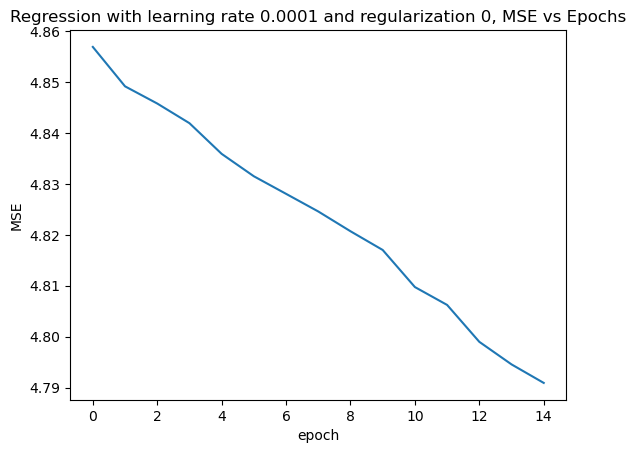

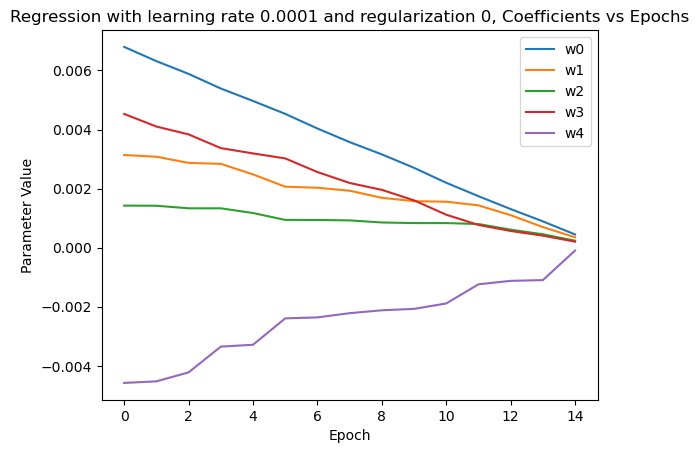

Learning rate:  0.0001 Regularization:  0 MSE:  4.7909017461138035
5
(15, 5)


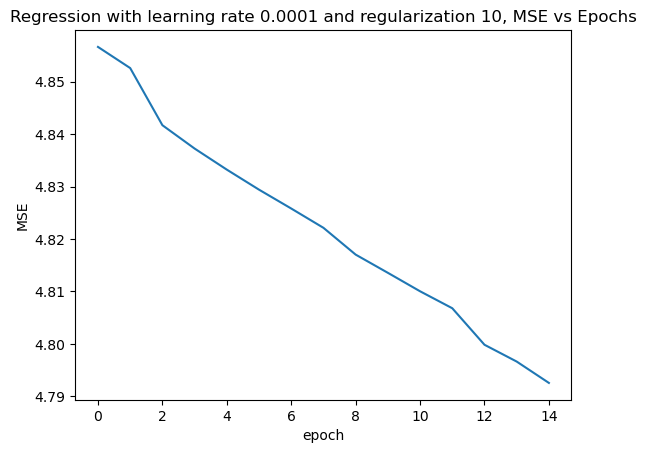

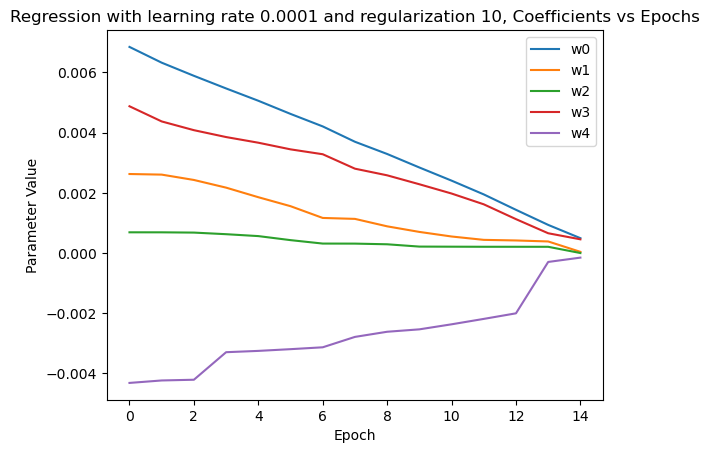

Learning rate:  0.0001 Regularization:  10 MSE:  4.792535573675722
5
(15, 5)


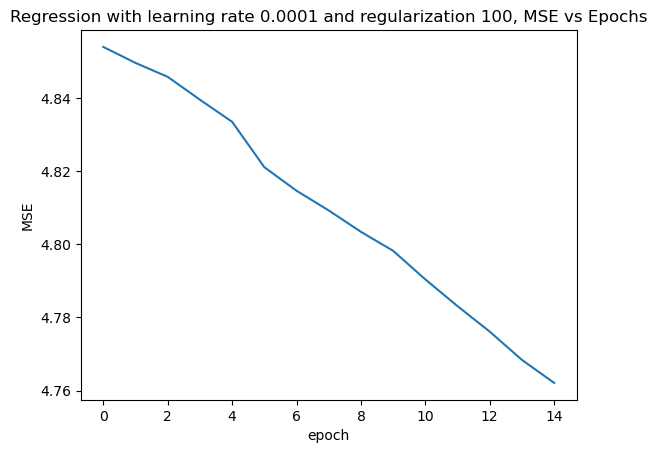

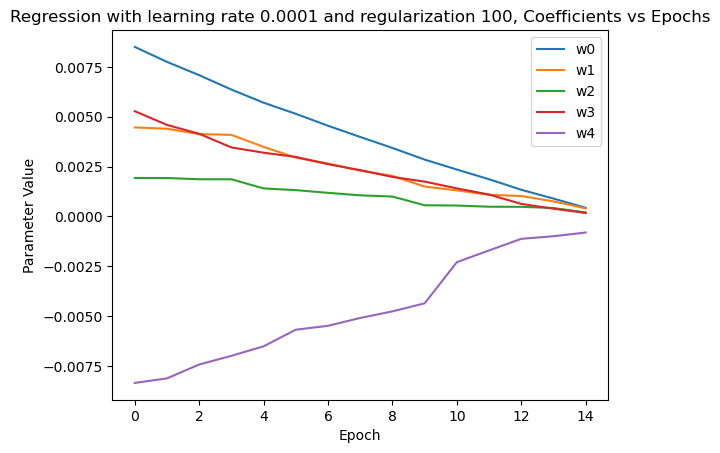

Learning rate:  0.0001 Regularization:  100 MSE:  4.762091140263693
5
(15, 5)


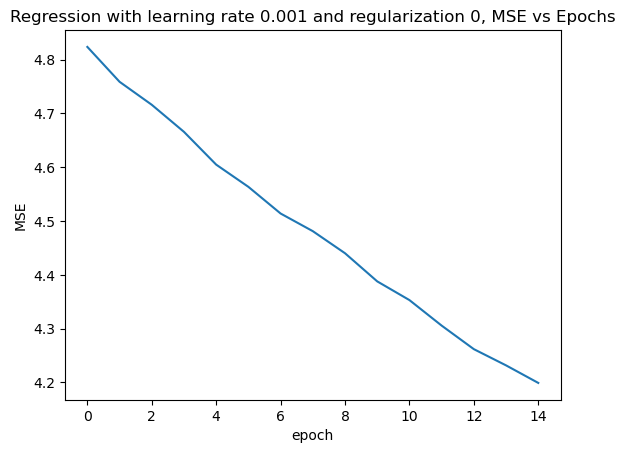

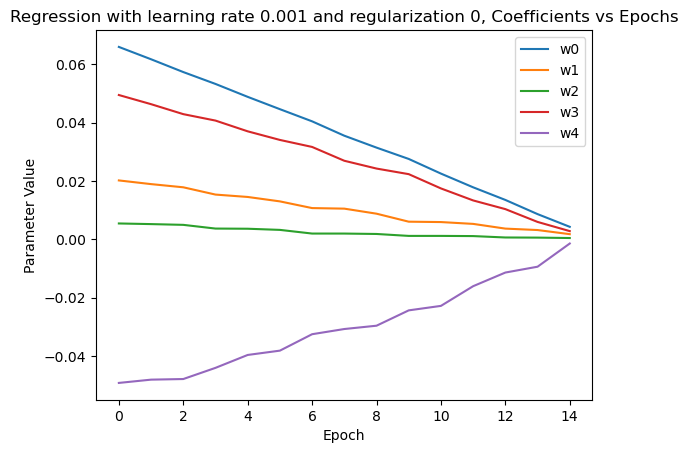

Learning rate:  0.001 Regularization:  0 MSE:  4.199082151119012
5
(15, 5)


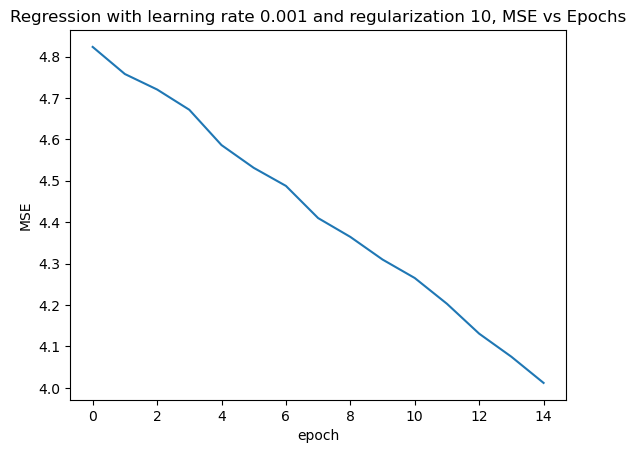

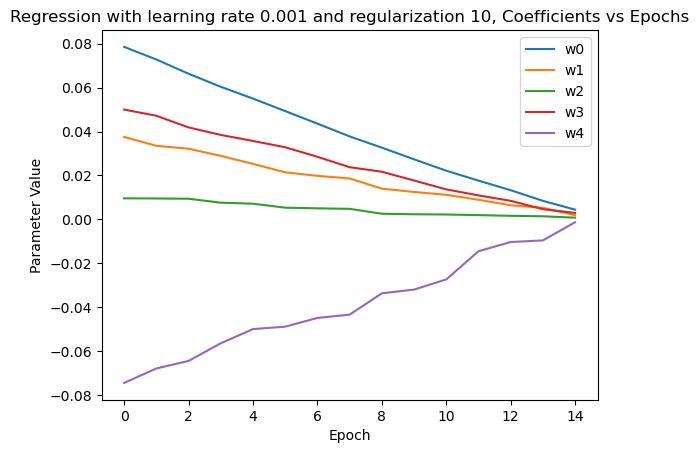

Learning rate:  0.001 Regularization:  10 MSE:  4.011882840507818
5
(15, 5)


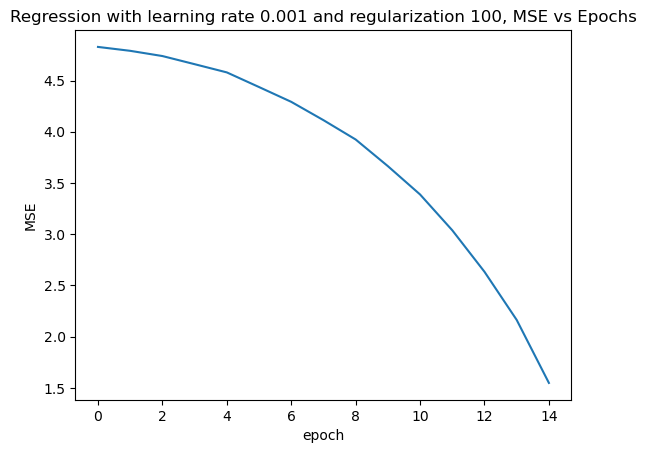

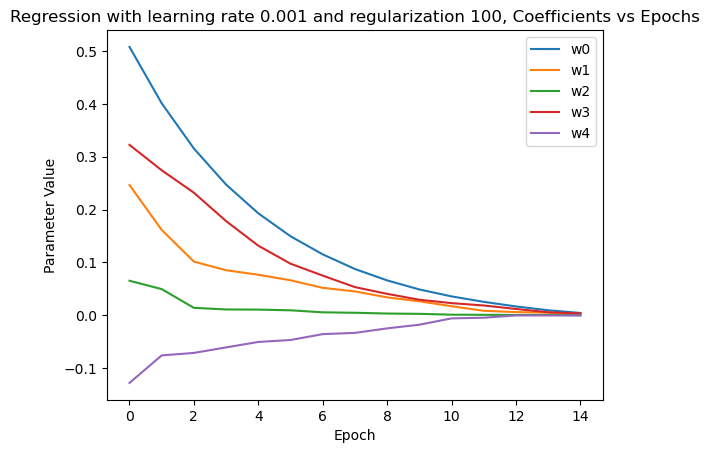

Learning rate:  0.001 Regularization:  100 MSE:  1.5486452973816787
5
(15, 5)


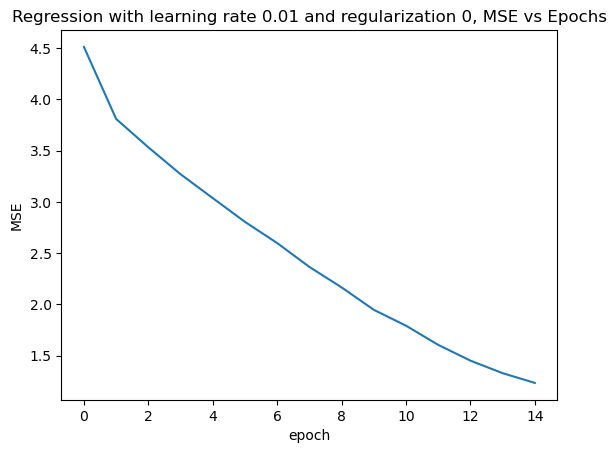

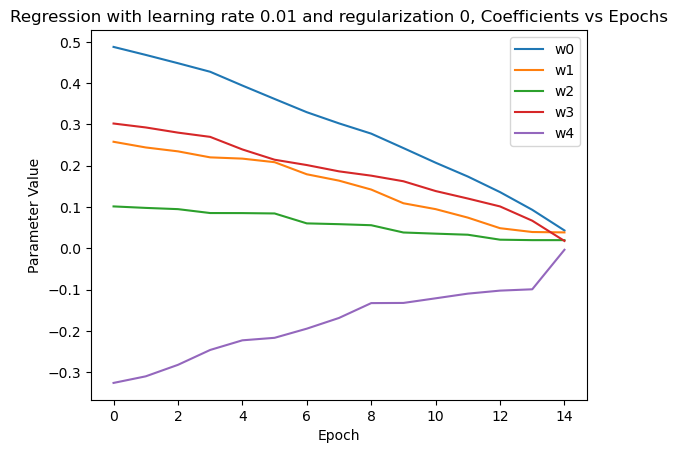

Learning rate:  0.01 Regularization:  0 MSE:  1.234759892536759
5
(15, 5)


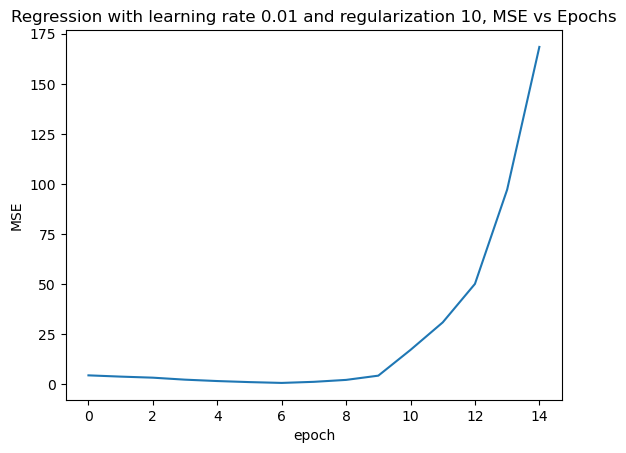

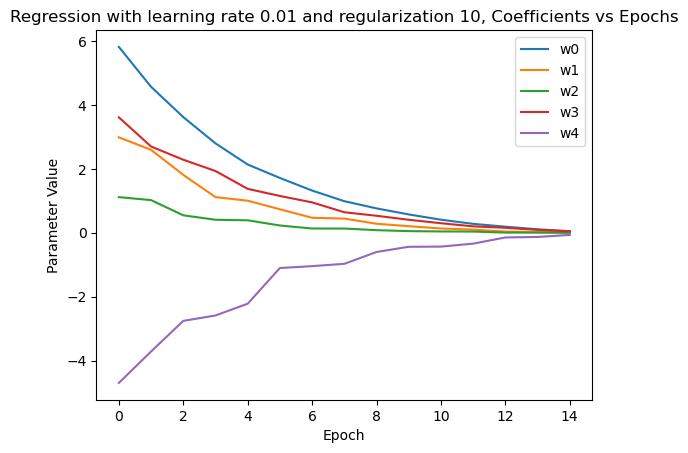

Learning rate:  0.01 Regularization:  10 MSE:  168.4311788775787
5
(15, 5)


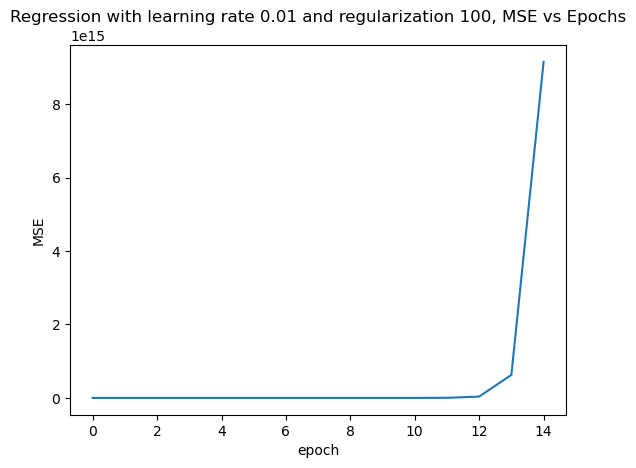

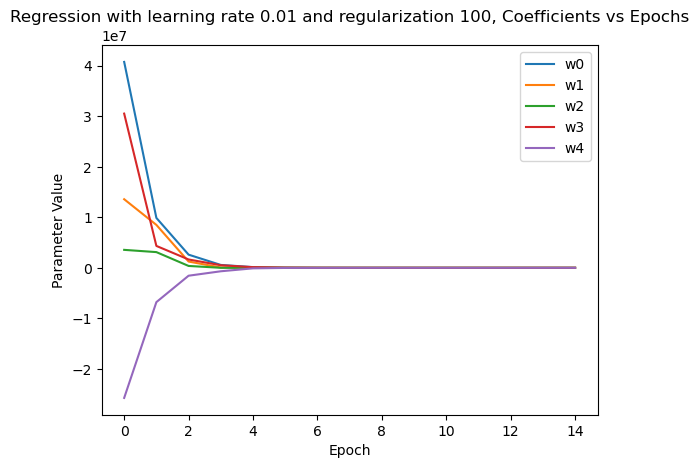

Learning rate:  0.01 Regularization:  100 MSE:  9147148051982280.0
5
(15, 5)


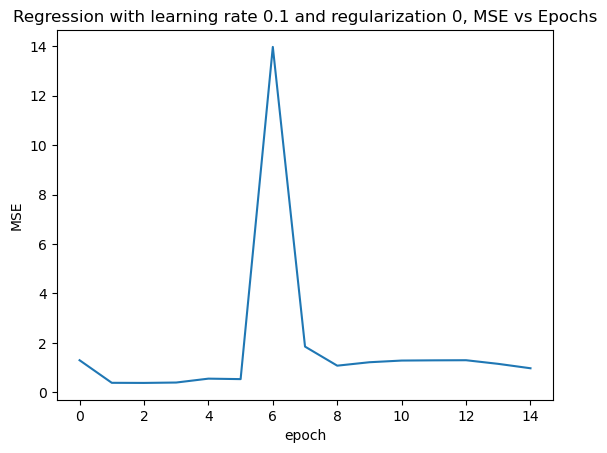

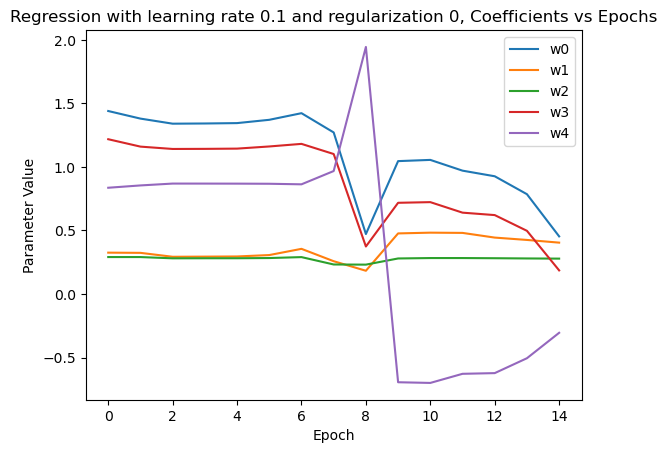

Learning rate:  0.1 Regularization:  0 MSE:  0.9704540517664779
5
(15, 5)


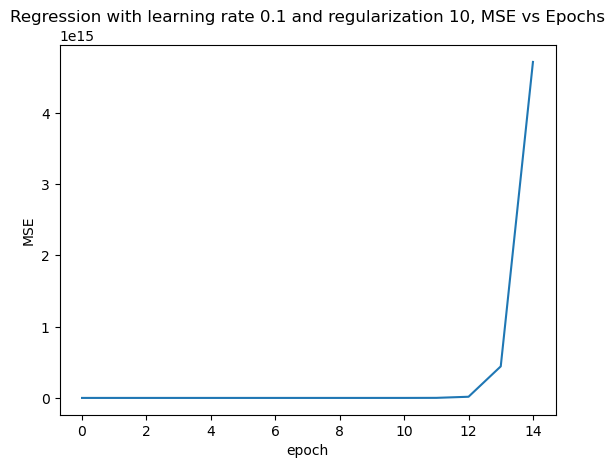

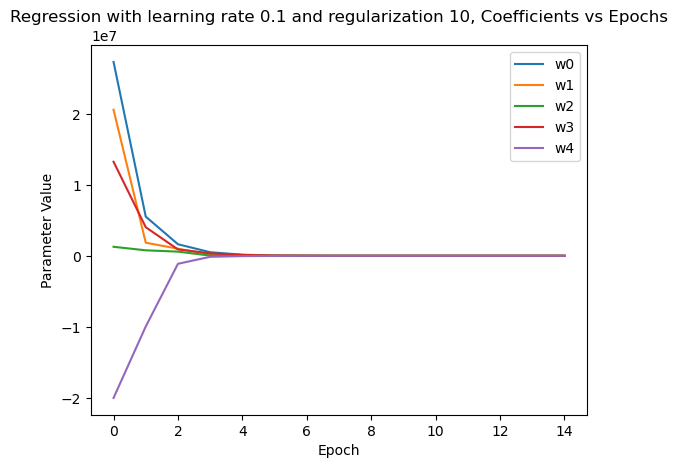

Learning rate:  0.1 Regularization:  10 MSE:  4713765523032385.0
5
(15, 5)


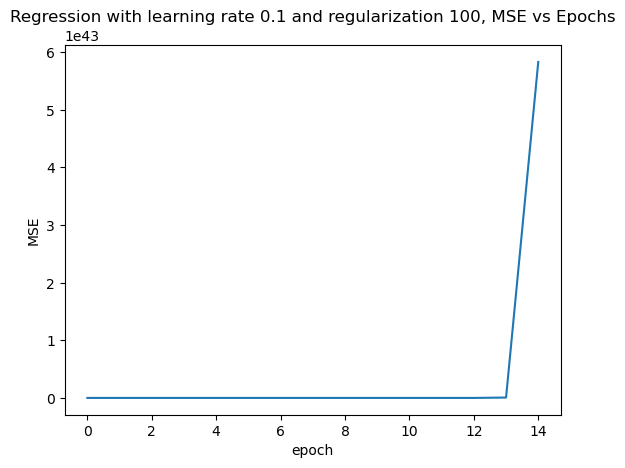

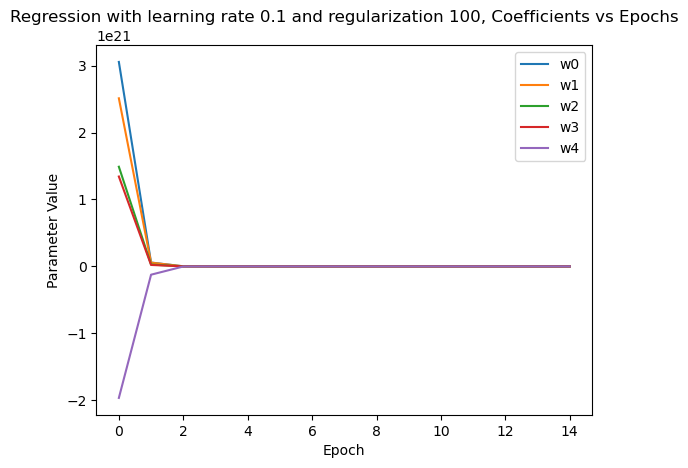

Learning rate:  0.1 Regularization:  100 MSE:  5.82977933254546e+43
5
(15, 5)


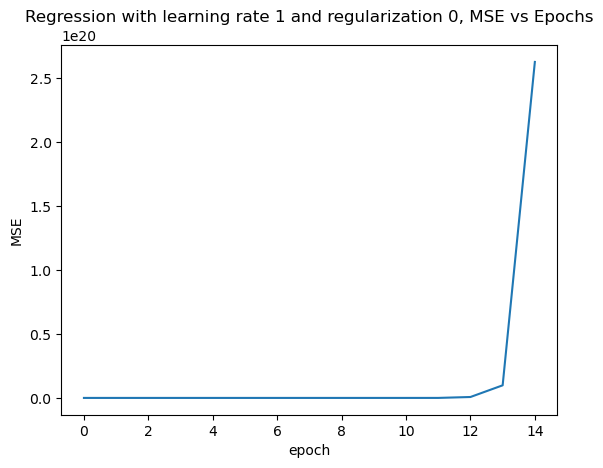

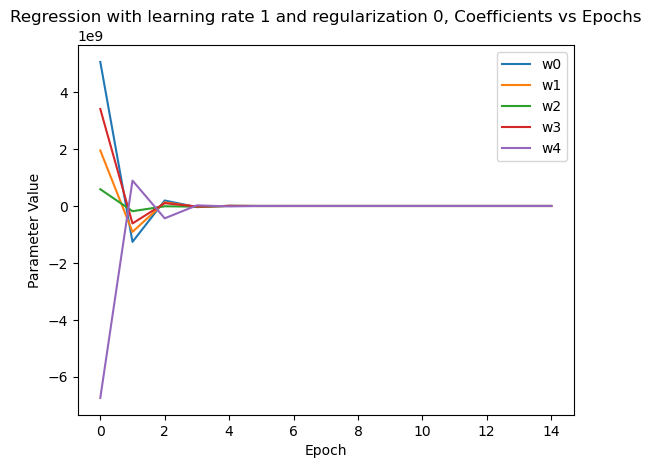

Learning rate:  1 Regularization:  0 MSE:  2.626193547296739e+20
5
(15, 5)


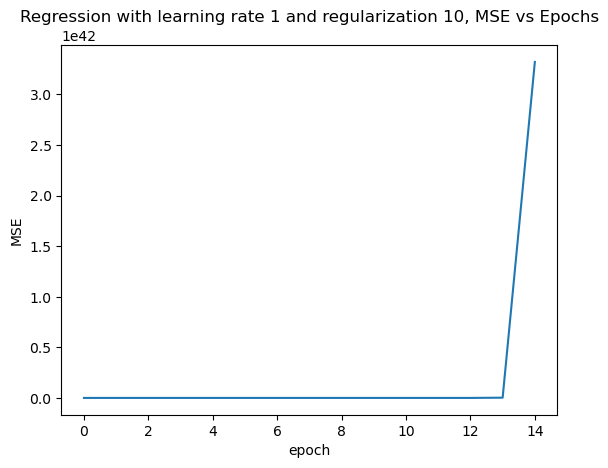

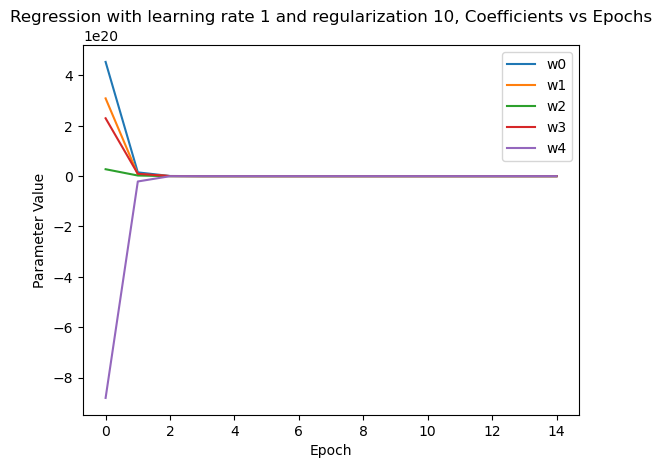

Learning rate:  1 Regularization:  10 MSE:  3.319944676225978e+42
5
(15, 5)


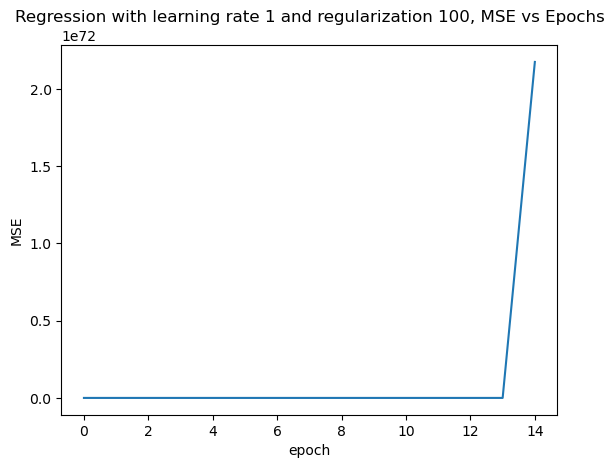

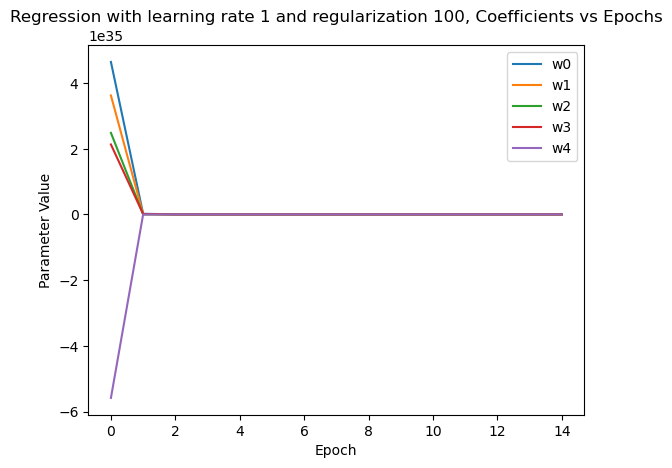

Learning rate:  1 Regularization:  100 MSE:  2.1728371131382346e+72
5
(15, 5)


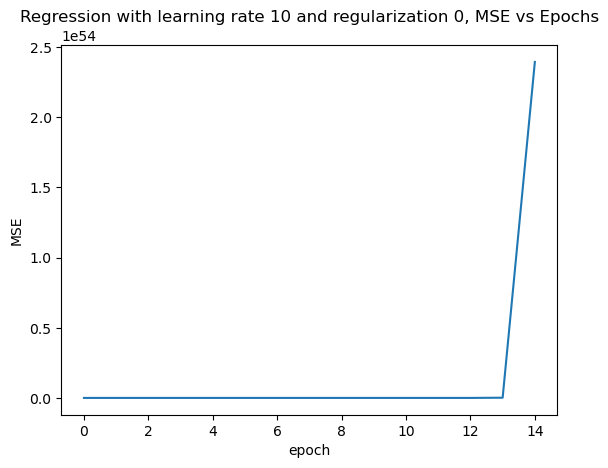

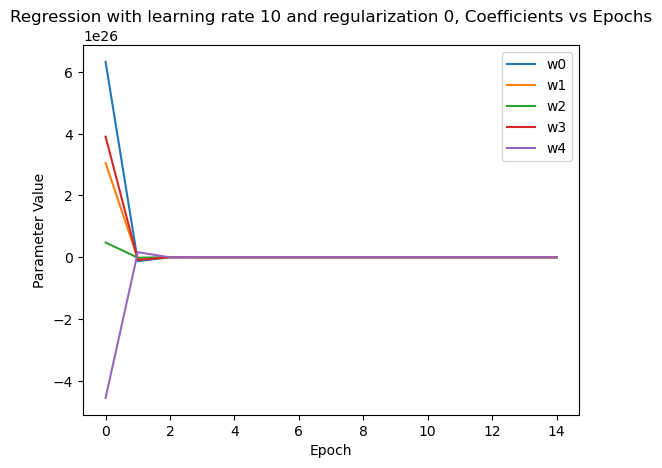

Learning rate:  10 Regularization:  0 MSE:  2.39320962143153e+54
5
(15, 5)


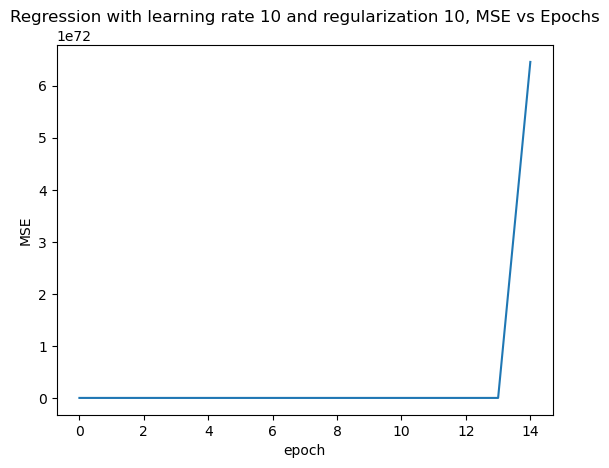

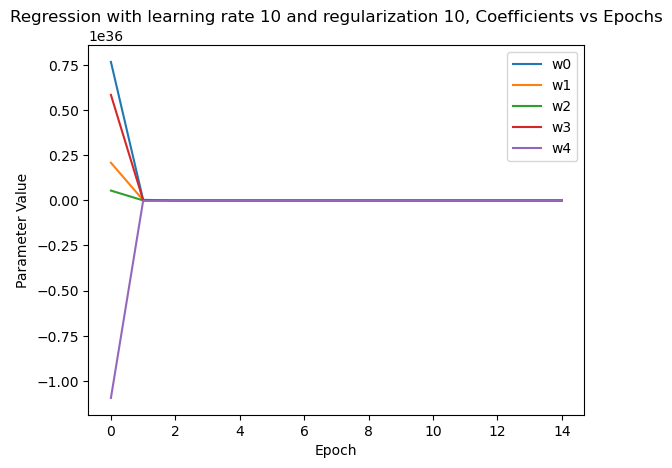

Learning rate:  10 Regularization:  10 MSE:  6.453764626225558e+72
5
(15, 5)


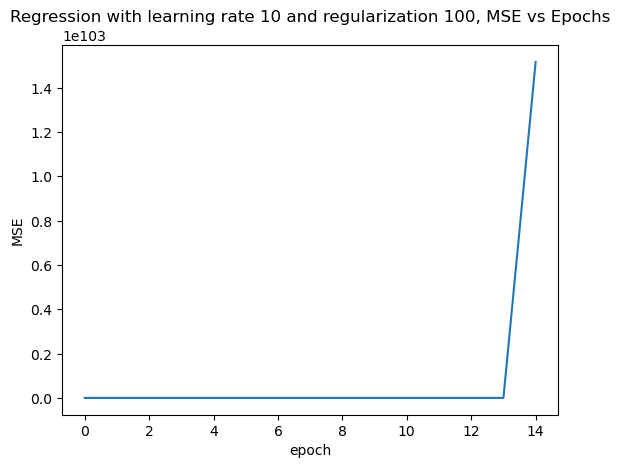

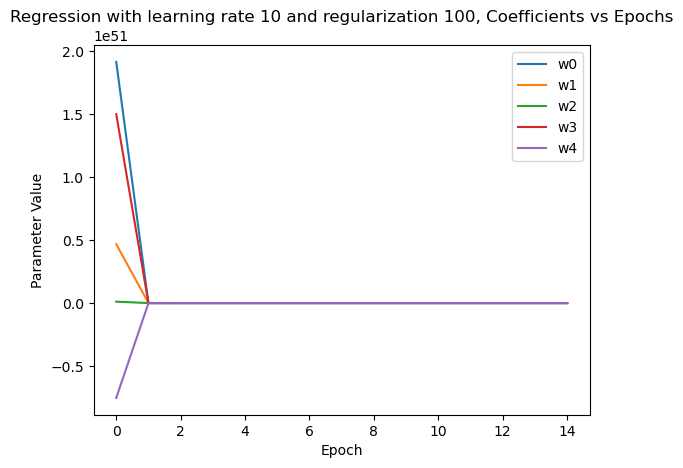

Learning rate:  10 Regularization:  100 MSE:  1.5170623028357192e+103
5
(15, 5)


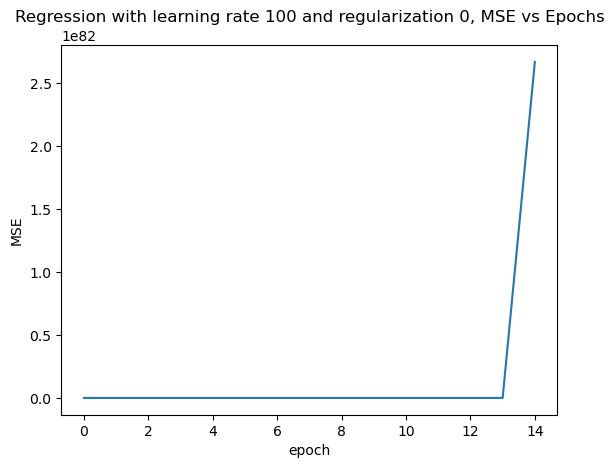

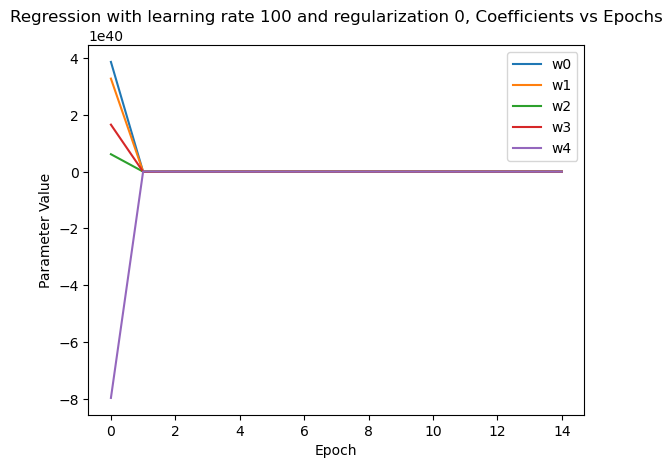

Learning rate:  100 Regularization:  0 MSE:  2.66469040304711e+82
5
(15, 5)


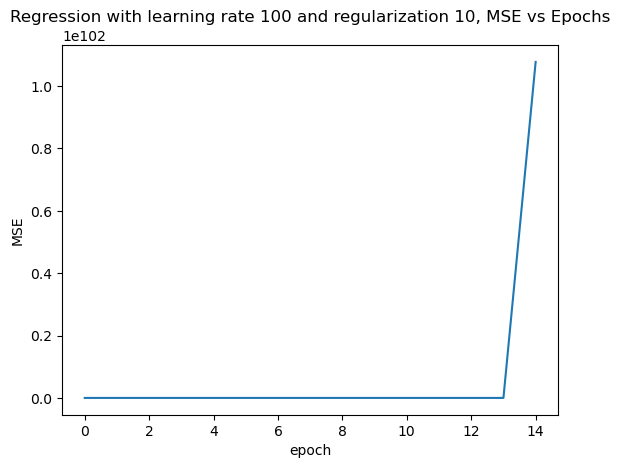

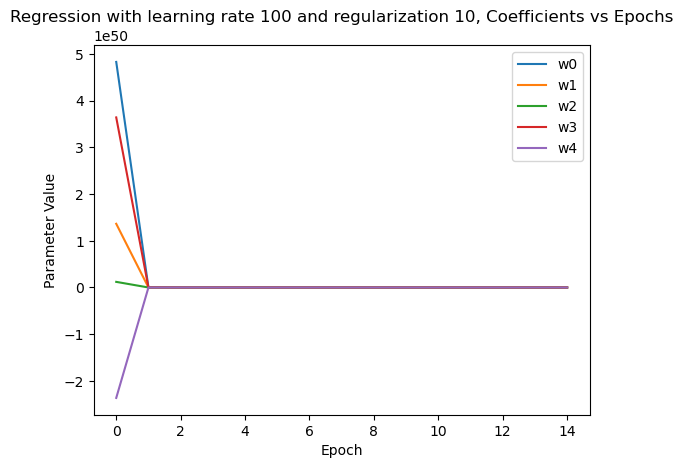

Learning rate:  100 Regularization:  10 MSE:  1.0767715408101362e+102
5
(15, 5)


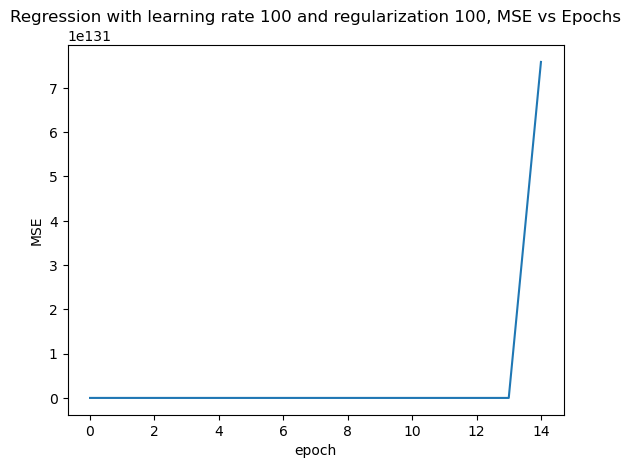

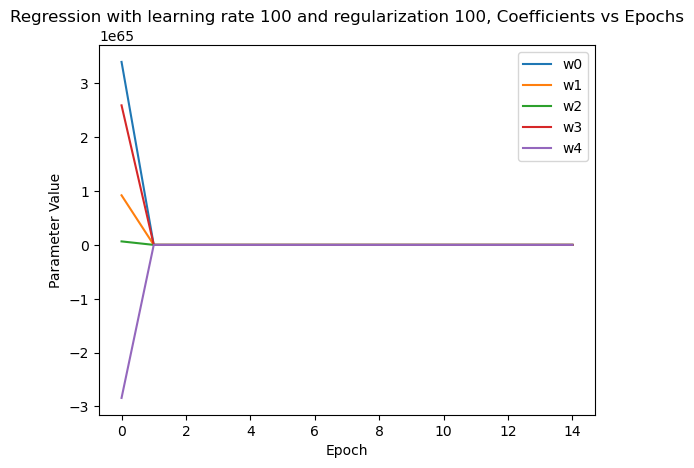

Learning rate:  100 Regularization:  100 MSE:  7.583548943891835e+131


In [82]:
for i in range(len(learning_rate)):
    for j in range(len(regularization)):
        model = Regression(learning_rate[i], regularization[j], n_epochs)
        model.fit(X, y, plot=True)
        print('Learning rate: ', learning_rate[i], 'Regularization: ', regularization[j], 'MSE: ', model.lowest_mse)

# Q2. Neural Network Basics (10 points)

1.1 Can a multi-layered neural network with only linear activation functions in all hidden layers be represented as a neural network without any hidden layer? Explain your answer. (5 points)

1.2 Suppose you are solving a problem for image datasets using neural networks. You are wondering if you should use neural network with fully-connected layers or a convolutional neural network. Which one do you think is better suited for this task and why? (Read up on convolutional neural networks if we have not covered this in class by due date). (5 points)



Solution

1.1 Yes since a multilayered neural network with only linear activation functions can be modeled as one large polynomial function that captures all of the behavior of the hidden layers, since the function of linear functions is also a linear function. This means we could just have a output layer that takes the input layer and applies a linear activation function that has the characteristics the larger hidden network model.

1.2 CNNs will be better for this task since they extract more meaningful information from images by using a variety of filters per layer that convolve with our images. These filters can capture many important qualities about an image such as edges and corners of an object in the first few layers, and deeper into the network it can start to have filters that emulate the appearance of the object (like having a filter that's shaped like an animal, or a filter that captures the structure of a certain type of vehicle). Filters are much more oriented towards image tasks as they can capture the spatial relationships between pixels easier with filters than just having fully connected layers that may or may not capture the important underlying features of an image by optimizing a network of fully connected layers. 

# Q3. MLP Regression with Pytorch (30 points)
Pytorch provides extensive built-in functions useful for developing and training neural networks. In this exercise, we will try to build a Multi-layer Perceptron for a regression problem.


In [4]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

/home/sidharth/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2.1 Dataset : Download the diabetes dataset from sklearn.datasets. Divide this dataset into train and test sets with 75% of data in train and 25% in test with random_seed = 42. To use this dataset with Pytorch we need to convert it to a pytorch compatible dataset, which is an object of the torch.utils.Dataset class. Use the class below to convert this diabetes dataset to a torch.utils.Dataset object. (5 points)

In [5]:
class DatasetCustom(torch.utils.data.Dataset):
  def __init__(self, X, y):
      self.X = torch.from_numpy(X)
      self.y = torch.from_numpy(y)

  def __len__(self):
      return len(self.X)

  def __getitem__(self, i):
      return self.X[i], self.y[i]

In [6]:
# load diabetes dataset
X, y = load_diabetes(return_X_y=True)
# split diabetes data into train and test sets with 75% split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# convert dataset into torch.utils.Dataset
train_dataset = DatasetCustom(X_train, y_train)
test_dataset = DatasetCustom(X_test, y_test)

2.2 Pytorch uses DataLoader class to load and iterate over a dataset for learning. Create a DataLoader object from the pytorch compatible dataset generated above with batchsize = 64 and shuffle = True. You can read more about Pytorch's Dataset and DataLoader [here](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html). (5 points)

In [7]:
# create dataloader for train and test sets
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

2.3 Network Design : Create a python class for a neural network with the following architecture:

   a) MLP : Linear layer (input_dim=10, output_dim = 4) followed by a ReLu layer and another linear layer (input_dim=4, output_dim = 1).

Pytorch [layers](https://pytorch.org/docs/stable/nn.html) are described here. The individual layers are stacked inside [Sequential](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html#torch.nn.Sequential). 

Each class implements an init() method that defines the network and a forward method that performs the operations defined under the network. See the example below for a 3-layer neural network. (5 points)


In [8]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(10, 4),
            nn.ReLU(),
            nn.Linear(4, 1)
        )

    def forward(self, x):
        return self.layers(x)
        

In [9]:
class Example(nn.Module):
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Linear(784, 64),
      nn.ReLU(),
      nn.Linear(64, 32),
      nn.ReLU(),
      nn.Linear(32, 1)
    )


  def forward(self, x):
    return self.layers(x)

2.4 Training : Train the above defined neural network using SGD optimizer with learning rate = 0.0001 for 50 epochs while minimizing for the MSELoss. (10 points) 

In [10]:
# Initialize the network
net = MLP()

loss_function = nn.L1Loss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.0001)

def train(train_loader):
  avg_loss = []
  for epoch in range(0, 500): 
      print(f'Epoch {epoch+1}')
      loss = 0.0
      losses = []
      optimizer.zero_grad() # zero the parameter gradients
      # Iterate over the DataLoader for training data
      for i, data in enumerate(train_loader):

        inputs, targets = data
        inputs = inputs.float()
        targets = targets.float()
        # predict for inputs using net
        outputs = net(inputs)
        # compute loss for predictions wrt targets
        loss = loss_function(outputs, targets)
        # Call backward on loss
        loss.backward() # backward pass: compute gradients
        # take one step of optimization
        optimizer.step() # update weights
        losses.append(loss.item())

      print(f'Loss: {np.mean(losses):.4f}')
      avg_loss.append(np.mean(losses))

  return avg_loss


loss_64 = train(train_loader)

Epoch 1
Loss: 151.1367
Epoch 2
Loss: 150.4820
Epoch 3
Loss: 156.5278
Epoch 4
Loss: 155.4464
Epoch 5
Loss: 154.5410
Epoch 6
Loss: 151.1510
Epoch 7
Loss: 154.9508
Epoch 8
Loss: 152.8030
Epoch 9
Loss: 153.3405
Epoch 10
Loss: 162.5357
Epoch 11
Loss: 156.4230
Epoch 12
Loss: 162.8076
Epoch 13
Loss: 159.4176
Epoch 14
Loss: 157.2824
Epoch 15
Loss: 149.8271
Epoch 16
Loss: 152.1463
Epoch 17
Loss: 158.7315
Epoch 18
Loss: 155.6427
Epoch 19
Loss: 158.3133
Epoch 20


/home/sidharth/miniconda3/lib/python3.9/site-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
/home/sidharth/miniconda3/lib/python3.9/site-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([11])) that is different to the input size (torch.Size([11, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Loss: 157.0939
Epoch 21
Loss: 154.3064
Epoch 22
Loss: 152.5978
Epoch 23
Loss: 152.4453
Epoch 24
Loss: 155.6300
Epoch 25
Loss: 154.8249
Epoch 26
Loss: 153.0536
Epoch 27
Loss: 156.1506
Epoch 28
Loss: 157.4409
Epoch 29
Loss: 152.7965
Epoch 30
Loss: 153.6099
Epoch 31
Loss: 155.1761
Epoch 32
Loss: 160.1303
Epoch 33
Loss: 157.2548
Epoch 34
Loss: 153.5511
Epoch 35
Loss: 151.5917
Epoch 36
Loss: 155.1280
Epoch 37
Loss: 155.2891
Epoch 38
Loss: 156.4160
Epoch 39
Loss: 156.0501
Epoch 40
Loss: 160.4898
Epoch 41
Loss: 156.0709
Epoch 42
Loss: 156.1316
Epoch 43
Loss: 158.4007
Epoch 44
Loss: 154.2831
Epoch 45
Loss: 151.4954
Epoch 46
Loss: 153.0617
Epoch 47
Loss: 153.4234
Epoch 48
Loss: 155.6798
Epoch 49
Loss: 156.9073
Epoch 50
Loss: 158.9507
Epoch 51
Loss: 148.8728
Epoch 52
Loss: 154.4417
Epoch 53
Loss: 154.4774
Epoch 54
Loss: 155.2907
Epoch 55
Loss: 159.7680
Epoch 56
Loss: 160.5188
Epoch 57
Loss: 157.1416
Epoch 58
Loss: 157.1771
Epoch 59
Loss: 148.6050
Epoch 60
Loss: 152.2793
Epoch 61
Loss: 156.8820
E

2.4 Plot the epoch loss (average of losses in all batches in one epoch) vs epoch when you set batch size = 64. In another figure, plot for epoch loss when you set batch size = 1. What do you observe? (5 points)

Epoch 1


/home/sidharth/miniconda3/lib/python3.9/site-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Loss: 151.6201
Epoch 2
Loss: 146.1255
Epoch 3
Loss: 140.6309
Epoch 4
Loss: 135.1363
Epoch 5
Loss: 129.6417
Epoch 6
Loss: 124.1970
Epoch 7
Loss: 118.7682
Epoch 8
Loss: 113.4153
Epoch 9
Loss: 108.4331
Epoch 10
Loss: 103.8234
Epoch 11
Loss: 99.7097
Epoch 12
Loss: 96.1778
Epoch 13
Loss: 92.9094
Epoch 14
Loss: 90.0660
Epoch 15
Loss: 87.4844
Epoch 16
Loss: 85.2151
Epoch 17
Loss: 83.1455
Epoch 18
Loss: 81.4376
Epoch 19
Loss: 79.8957
Epoch 20
Loss: 78.4369
Epoch 21
Loss: 77.2930
Epoch 22
Loss: 76.2367
Epoch 23
Loss: 75.3312
Epoch 24
Loss: 74.5355
Epoch 25
Loss: 73.7497
Epoch 26
Loss: 73.0270
Epoch 27
Loss: 72.3970
Epoch 28
Loss: 71.8611
Epoch 29
Loss: 71.2841
Epoch 30
Loss: 70.6166
Epoch 31
Loss: 70.1082
Epoch 32
Loss: 69.6147
Epoch 33
Loss: 69.2753
Epoch 34
Loss: 68.9666
Epoch 35
Loss: 68.6684
Epoch 36
Loss: 68.4375
Epoch 37
Loss: 68.1334
Epoch 38
Loss: 67.9159
Epoch 39
Loss: 67.7236
Epoch 40
Loss: 67.4753
Epoch 41
Loss: 67.2719
Epoch 42
Loss: 67.1341
Epoch 43
Loss: 66.9920
Epoch 44
Loss: 66.

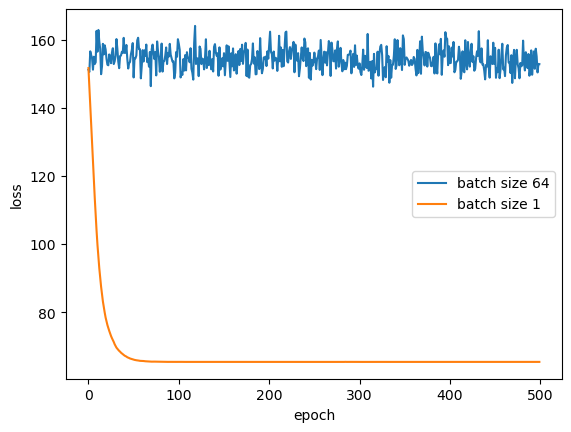

In [11]:
import matplotlib.pyplot as plt

# now set batch size to 1 and train
batch_size = 1
train_loader_1 = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader_1 = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
loss_1 = train(train_loader_1)

# plot the loss vs epoch for both batch sizes
plt.figure()
plt.plot(range(500), loss_64, label='batch size 64')
plt.plot(range(500), loss_1, label='batch size 1')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

# Observation
The above graph shows that the smaller batch size has signifcantly less loss, however this comes at the expense of taking much longer to train. This makes sense since we are using much more data to optimize our parameters, and as such we are getting a more robust and accurate represenation of the underlying distribution of data that allows us to perform much better when making inference on the test set. 

#Question 4: Tensorflow Playground (15 pts)

In this question, you will be playing with [Tensorflow Playground](https://playground.tensorflow.org).

Select "**Classification**" as the **Problem Type**. Among the four datasets shown in DATA, please select the **top right** dataset. 

Use the following settings as the DEFAULT settings for all **subquestions**: Learning rate = 0.03, Activation = Tanh, Regularization = None, Ratio of training to test data = 50%, Noise = 0, Batch Size = 30, input as $X_1$ with $X_2$, One hidden layer with two neurons, .

a) **(4 pts)** Use the DEFAULT setting and run two experiments - one using **Tanh** as the activation function and one using the **Linear** activation function. Report the train, test losses for both at the end of **1000 epochs**. What qualitative difference do you observe in the decision boundaries obtained? What do you think is the reason for this? 

We will now study the effect of certain variations in the network structure or training process, keeping all other aspects the same as in the DEFAULT setting specified above, with **Tanh** as the activation.

b) **(4 pts)** Effect of number of hidden units: Keep other settings the same as in DEFAULT, report the training loss and test loss at the end of 1000 epochs **using 4 neurons and 8 neurons in the hidden layer**. What do you observe in terms of the decision boundary obtained as the number of neurons increases? What do you think is the reason for this? 

c) **(4 pts)** Effect of Learning rate and number of epochs: Keep other settings the same as in DEFAULT, change the Activation to **ReLU** and use **4 neurons** in the hidden layer. For learning rate 10, 1, 0.1, 0.01 and 0.001, report the train, test losses at the end of **100 epochs**, **1000 epochs** respectively. What do you observe from the change of loss vs learning rate, and the change of loss vs epoch numbers? 

d) **(3 pts)** Use the DEFAULT setting. Play around with any hyperparameters, network architectures or input features (such as $\sin(X_1), X_1^2$ etc.), and report the best train and test loss you obtain (test loss should be no greater than 0.06). Attach the screenshot showing your full network, output and the parameters. Briefly justify your results, and comment on what helps/what doesn't help with lowering the loss, etc. 